<a href="https://colab.research.google.com/github/uca-spider/EDA_IMDb/blob/main/diabetes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import library dasar untuk analisis data
import pandas as pd
import numpy as np

# Import library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk machine learning dari scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Import library untuk evaluasi model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Mengatur agar visualisasi tampil di notebook
%matplotlib inline

In [8]:
# Muat dataset dari file CSV yang sudah Anda unduh
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/colab/diabetes.csv')

# Tampilkan 5 baris pertama untuk melihat struktur data
print("5 Baris Pertama Data:")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
5 Baris Pertama Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Dapatkan informasi umum tentang dataset (tipe data, non-null values)
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Dapatkan ringkasan statistik dari data numerik
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0

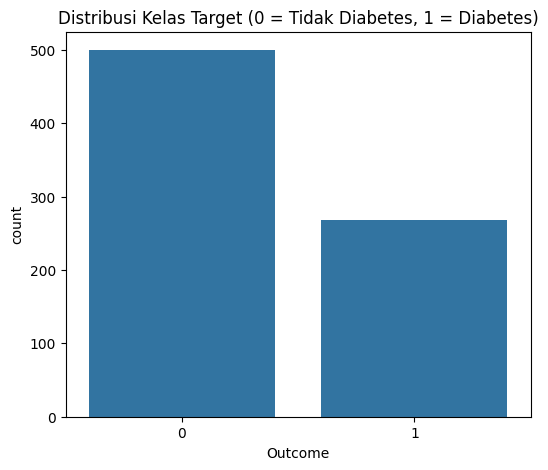

Outcome
0    500
1    268
Name: count, dtype: int64


In [9]:
# Melihat keseimbangan data target (Outcome)
plt.figure(figsize=(6, 5))
sns.countplot(x='Outcome', data=df)
plt.title('Distribusi Kelas Target (0 = Tidak Diabetes, 1 = Diabetes)')
plt.show()

print(df['Outcome'].value_counts())

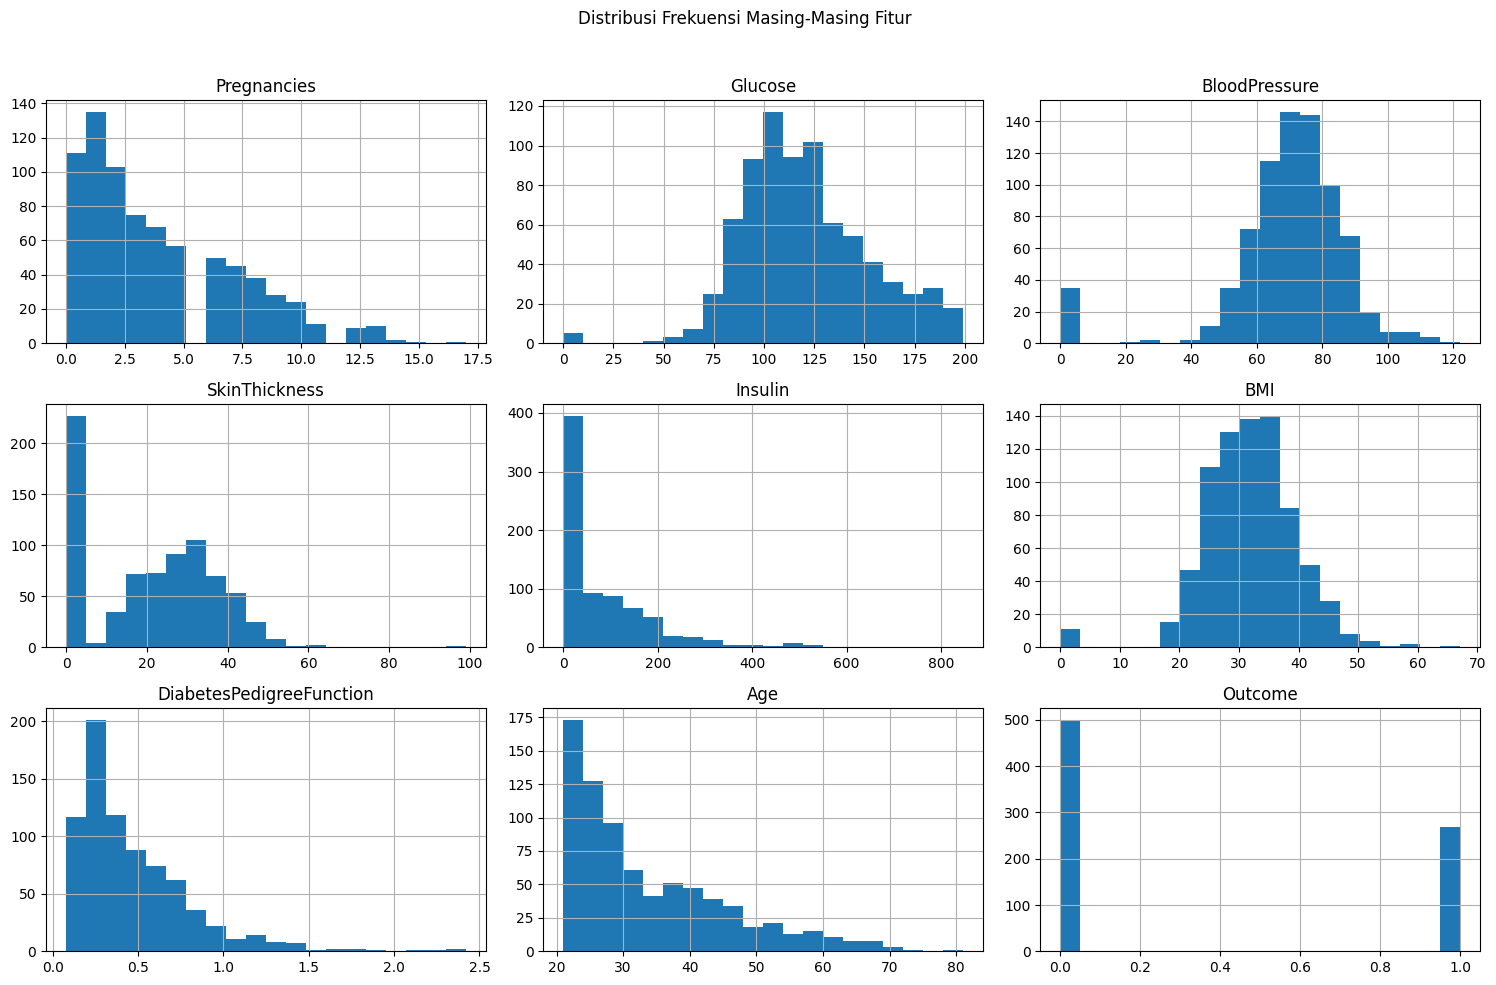

In [10]:
# Melihat distribusi semua fitur untuk mengonfirmasi adanya nilai 0 yang aneh
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribusi Frekuensi Masing-Masing Fitur")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [11]:
# Menangani nilai nol yang janggal
# Mengganti nilai 0 dengan nilai median dari kolom masing-masing.
# Median digunakan karena lebih tahan terhadap outlier daripada mean.
# Kolom 'Pregnancies' dan 'Outcome' tidak diubah karena 0 adalah nilai yang valid.

cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_replace:
    median_val = df[col].median()
    df[col] = df[col].replace(0, median_val)

print("\nStatistik Deskriptif Setelah Mengganti Nilai 0:")
print(df.describe())


Statistik Deskriptif Setelah Mengganti Nilai 0:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std       3.369578   30.438286      12.096642       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232 

In [12]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardisasi Fitur
# Model seperti Logistic Regression sensitif terhadap skala fitur. Scaling membuat semua fitur memiliki skala yang sama.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi data latih (train) dan data uji (test)
# Menggunakan stratify=y untuk memastikan proporsi kelas di data train dan test sama dengan data asli.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nBentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")


Bentuk X_train: (614, 8)
Bentuk X_test: (154, 8)


In [14]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')
}

# Latih setiap model
for name, model in models.items():
    print(f"Melatih model {name}...")
    model.fit(X_train, y_train)

Melatih model Logistic Regression...
Melatih model Random Forest...
Melatih model XGBoost...


In [18]:
lr_model = models['Logistic Regression']
y_pred_lr = lr_model.predict(X_test)

print("Prediksi dengan model Logistic Regression telah selesai dibuat.")

Prediksi dengan model Logistic Regression telah selesai dibuat.


In [19]:
# Tampilkan metrik akurasi dan laporan klasifikasi
print("--- Laporan Teks & Metrik: Logistic Regression ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_lr):.4f}\n")
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_lr, target_names=['Non-Diabetes', 'Diabetes']))

--- Laporan Teks & Metrik: Logistic Regression ---
Akurasi: 0.7078

Laporan Klasifikasi:
              precision    recall  f1-score   support

Non-Diabetes       0.75      0.82      0.78       100
    Diabetes       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



--- Visualisasi Matriks: Logistic Regression ---


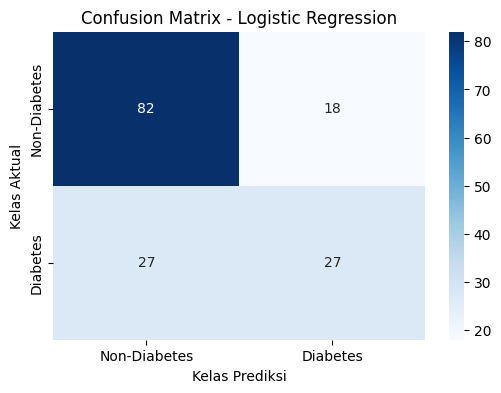

In [20]:
# Hitung dan visualisasikan confusion matrix
print("--- Visualisasi Matriks: Logistic Regression ---")
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetes', 'Diabetes'],
            yticklabels=['Non-Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Kelas Aktual')
plt.xlabel('Kelas Prediksi')
plt.show()

In [21]:
rf_model = models['Random Forest']
y_pred_rf = rf_model.predict(X_test)

print("Prediksi dengan model Random Forest telah selesai dibuat.")

Prediksi dengan model Random Forest telah selesai dibuat.


In [22]:
# Tampilkan metrik akurasi dan laporan klasifikasi
print("--- Laporan Teks & Metrik: Random Forest ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_rf):.4f}\n")
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf, target_names=['Non-Diabetes', 'Diabetes']))

--- Laporan Teks & Metrik: Random Forest ---
Akurasi: 0.7597

Laporan Klasifikasi:
              precision    recall  f1-score   support

Non-Diabetes       0.79      0.85      0.82       100
    Diabetes       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



In [23]:
# Tampilkan metrik akurasi dan laporan klasifikasi
print("--- Laporan Teks & Metrik: Random Forest ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_rf):.4f}\n")
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf, target_names=['Non-Diabetes', 'Diabetes']))

--- Laporan Teks & Metrik: Random Forest ---
Akurasi: 0.7597

Laporan Klasifikasi:
              precision    recall  f1-score   support

Non-Diabetes       0.79      0.85      0.82       100
    Diabetes       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



--- Visualisasi Matriks: Random Forest ---


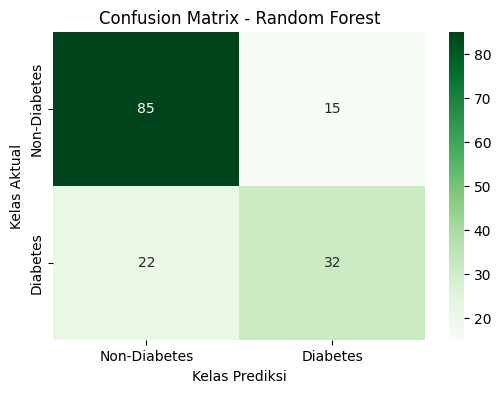

In [24]:
# Hitung dan visualisasikan confusion matrix
print("--- Visualisasi Matriks: Random Forest ---")
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non-Diabetes', 'Diabetes'],
            yticklabels=['Non-Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Kelas Aktual')
plt.xlabel('Kelas Prediksi')
plt.show()

In [25]:
# Pilih model dari dictionary dan buat prediksi
xgb_model = models['XGBoost']
y_pred_xgb = xgb_model.predict(X_test)

print("Prediksi dengan model XGBoost telah selesai dibuat.")

Prediksi dengan model XGBoost telah selesai dibuat.


In [26]:
# Tampilkan metrik akurasi dan laporan klasifikasi
print("--- Laporan Teks & Metrik: XGBoost ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_xgb):.4f}\n")
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_xgb, target_names=['Non-Diabetes', 'Diabetes']))

--- Laporan Teks & Metrik: XGBoost ---
Akurasi: 0.7727

Laporan Klasifikasi:
              precision    recall  f1-score   support

Non-Diabetes       0.80      0.86      0.83       100
    Diabetes       0.70      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



--- Visualisasi Matriks: XGBoost ---


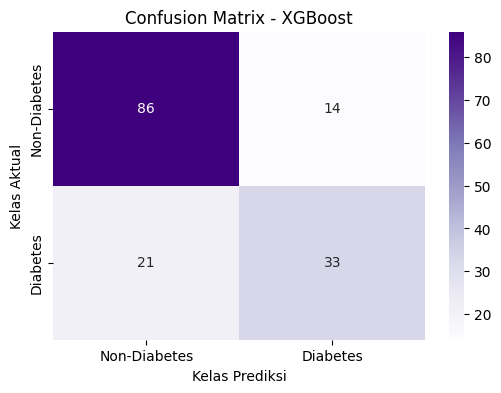

In [28]:
# Hitung dan visualisasikan confusion matrix
print("--- Visualisasi Matriks: XGBoost ---")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Non-Diabetes', 'Diabetes'],
            yticklabels=['Non-Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('Kelas Aktual')
plt.xlabel('Kelas Prediksi')
plt.show()